In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2/9.0)

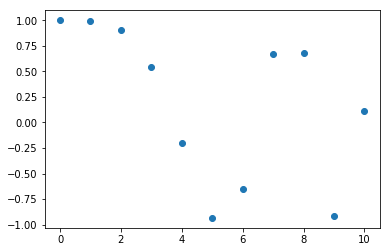

In [4]:
plt.plot(x,y,'o')

# Splines Interpolation

I know the real function $f(x) = \cos(\frac{-x^2}{9})$ sampled in the sample points $\bar{x} = 1, 2, \dots, n$

In [42]:
sx = np.linspace(0, 10, num=11)
sy = np.cos(-x**2/9.0)

I want to evaluate my splined-function in a certain set of point that I call $x$

In [43]:
x = np.linspace(0, 10, num=100)

I need to identify the _n_ intervals into I want to define my piecewise function.

In [44]:
bool_intervals = [(sx[i] <= x)& (x < sx[i+1]) for i in range(len(sx)-1)]
#This list should be done in a more intelligent way!

I define every piece of my function in a list of functions

In [45]:
from functools import partial
def func_piece(n,x):
    return sy[n] + (sy[n+1] - sy[n])/(sx[n+1]-sx[n])*(x-sx[n])
func_pieces = [partial(func_piece, i) for i in range(len(sx)-1)]   

I define my vector of values avaluated on the splined function

In [46]:
spline_y=np.piecewise(x, bool_intervals, func_pieces)

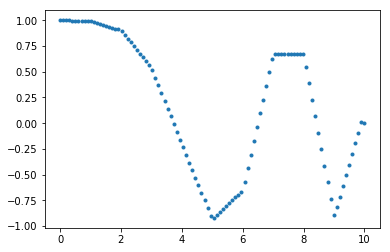

In [49]:
plt.plot(x, spline_y,'.')

Now I try a more clear implementation

In [50]:
def triangolar_function(x, h):
    abs_x = np.abs(x)
    return np.piecewise(x,[abs_x < h, abs_x >= h],[lambda x : 1 - np.abs(x)/h , lambda x: 0])    

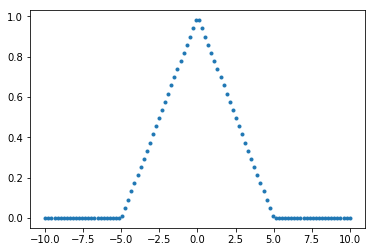

In [51]:
x = np.linspace(-10, 10, 100)
y = triangolar_function(x,5)
plt.plot(x,y,'.')

### Quadratic Splines

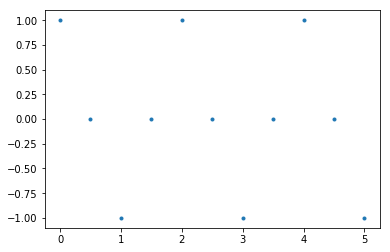

In [139]:
def f(x):
    return np.cos(np.pi * x)

n=10
sx = np.linspace(0, 5, n +1)
sy = f(sx)
x = np.linspace(-3, 8, num=100)
plt.plot(sx, sy, '.')

In [140]:
s = np.zeros(n)
a = np.zeros(n)
#I always should know the first derivative evaluated in the first point!
s[0]= - np.pi * np.sin(np.pi * sx[0])

In [141]:
delta = sx[:-1] - sx[1:]
deltaf = sy[:-1] - sy[1:]

In [142]:
#Is there a better way to do this? I can't do that in parallel. Should I make it recoursive???
a[0] = (deltaf[0] - s[0])/delta[0]
for i in range(1,n-1):    
    a[i]=(deltaf[i] - s[i])/delta[i]
    s[i]=s[i-1] + 2*a[i-1]*delta[i-1]

In [143]:
bool_intervals = [(sx[i] <= x)& (x < sx[i+1]) for i in range(n-1)]
bool_intervals = [(x < sx[0])] + bool_intervals + [(x > sx[n])]

In [144]:
from functools import partial
def quad_piece(k,x):
    return sy[k] + s[k]*(x-sx[k]) + a[k]*(x-sx[k])**2
def pre_extra(x):
    return sy[0] + s[0]*(x-sx[0])
def post_extra(x):
    return sy[n-1] + s[n-1]*(x-sx[n-1])

quad_pieces =[pre_extra] + [partial(func_piece, i) for i in range(n-1)] + [post_extra]

In [145]:
len(bool_intervals)

11

In [146]:
quad_spline_y=np.piecewise(x, bool_intervals, quad_pieces)

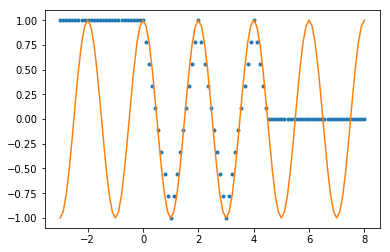

In [147]:
plt.plot(x, quad_spline_y,'.', x, f(x), '-')